# Buffer and Quality of Service Simulations - Mathematical Modelling Case Study

In [1]:
# IMPORT APPROPRIATE LIBRARIES #
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# CHOOSE PARAMETERS #
lamb = 1; mu = 1; B = 3; T = 100
a = [1,2,1]; p = [0.3,0.1,0.6] # mixture of exponential arrays, p must sum to 1
p_cum = np.cumsum(p) # lmao

# SET PARAMETERS FOR LOOP #
elapsing = True # while loop parameter
t_elapsed = 0 # time elapsed since t=0 (starts at 0)
arrivals = np.array([]) # array for time between data arrivals
buff_state = 0 # current buffer state (starts at 0)
buff_array = np.zeros(1) # array to store buffer state at every data arrival (first entry is 0 for state at t=0)

# SIMULATE BUFFER WITH WHILE LOOP #
while elapsing:
    
    t_arrival = np.random.exponential(lamb) # sample time between data arrivals from exp dist
    
    if t_elapsed + t_arrival < T: # make sure arrivals fall within the time range t specified
        
        arrivals = np.append(arrivals,t_arrival) 
        t_elapsed += t_arrival # update current time
        
        p_finder = np.random.uniform() # select a random value in range [0,1]
        p_index = np.searchsorted(p_cum, p_finder, 'right') # use p_finder to find which exponential in mixture to sample from
        job_size = np.random.exponential(a[p_index]) # sample job size from chosen distribution
         
        buff_state = min(B,max(buff_state - mu*t_arrival,0) + job_size) # find buffer state
        buff_array = np.append(buff_array,buff_state)
        
    else:
        
        elapsing = False # end loop when time elapsed exceeds final time T
        final_buff_state = min(B,max(buff_state - mu*(T-t_elapsed),0)) # find buffer state at final time t=T
        buff_array = np.append(buff_array,final_buff_state) 

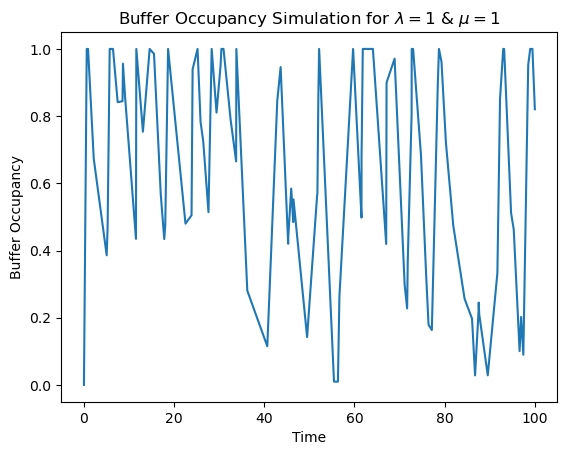

In [3]:
t_plot = np.cumsum(arrivals) # time array for plotting that cumulatively sums arrival times
t_plot = np.append(0,t_plot); t_plot = np.append(t_plot,T) # add 0 time and final time T to start and end of the array
buff_plot = buff_array/B # find buffer occupancy array by dividing by buffer size

# PLOT BUFFER OCCUPANCY OVER TIME #
plt.plot(t_plot,buff_plot)
plt.xlabel('Time'); plt.ylabel('Buffer Occupancy')
plt.title(f'Buffer Occupancy Simulation for $\lambda = {lamb}$ & $\mu = {mu}$')
plt.show()